In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sqlite3
from scipy.stats import ttest_ind
import scipy.stats as stats
warnings.filterwarnings('ignore')

## loading Dataset

In [2]:
# Create database connection
conn = sqlite3.connect('inventory.db')

# fetching vendor summary Data
df = pd.read_sql_query("select * from vendor_sales_summary",conn)
df.head()


,VendorNumber,VendorName,Brand,Description,ActualPrice,PurchasePrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollar,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,36.99,26.27,1750.0,145080,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68,1290667.91,25.297693,97.910808,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,28.99,23.19,1750.0,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,1015032.27,21.062810,97.688950,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,24.99,18.24,1750.0,187407,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1119816.92,24.675786,99.857529,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,22.99,16.17,1750.0,201682,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,1214774.94,27.139908,99.370296,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,29.99,21.89,1750.0,138109,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07,1199901.61,28.412764,98.355647,1.396897


## Exploratory Analysis

- previously we examined various tables in the Dataset to identify key variables, understand their relationship, and determine which one should be included in the final analysis.

- In this phase of EDA, we will analyze the resultant to gain insights into the distribution of each column. This will Help understand data patterns, identify anomalies, and insure data quality before proceeding with further analysis.

In [3]:
# Summary Statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,10692.0,1.065065e+04,18753.519148,2.00,3951.000000,7153.000000,9552.000000,2.013590e+05
Brand,10692.0,1.803923e+04,12662.187074,58.00,5793.500000,18761.500000,25514.250000,9.063100e+04
ActualPrice,10692.0,3.564367e+01,148.246016,0.49,10.990000,15.990000,28.990000,7.499990e+03
PurchasePrice,10692.0,2.438530e+01,109.269375,0.36,6.840000,10.455000,19.482500,5.681810e+03
Volume,10692.0,8.473605e+02,664.309212,50.00,750.000000,750.000000,750.000000,2.000000e+04
TotalPurchaseQuantity,10692.0,3.140887e+03,11095.086769,1.00,36.000000,262.000000,1975.750000,3.376600e+05
TotalPurchaseDollars,10692.0,3.010669e+04,123067.799627,0.71,453.457500,3655.465000,20738.245000,3.811252e+06
TotalSalesQuantity,10692.0,3.077482e+03,10952.851391,0.00,33.000000,261.000000,1929.250000,3.349390e+05
TotalSalesDollar,10692.0,4.223907e+04,167655.265984,0.00,729.220000,5298.045000,28396.915000,5.101920e+06
TotalSalesPrice,10692.0,1.879378e+04,44952.773386,0.00,289.710000,2857.800000,16059.562500,6.728193e+05


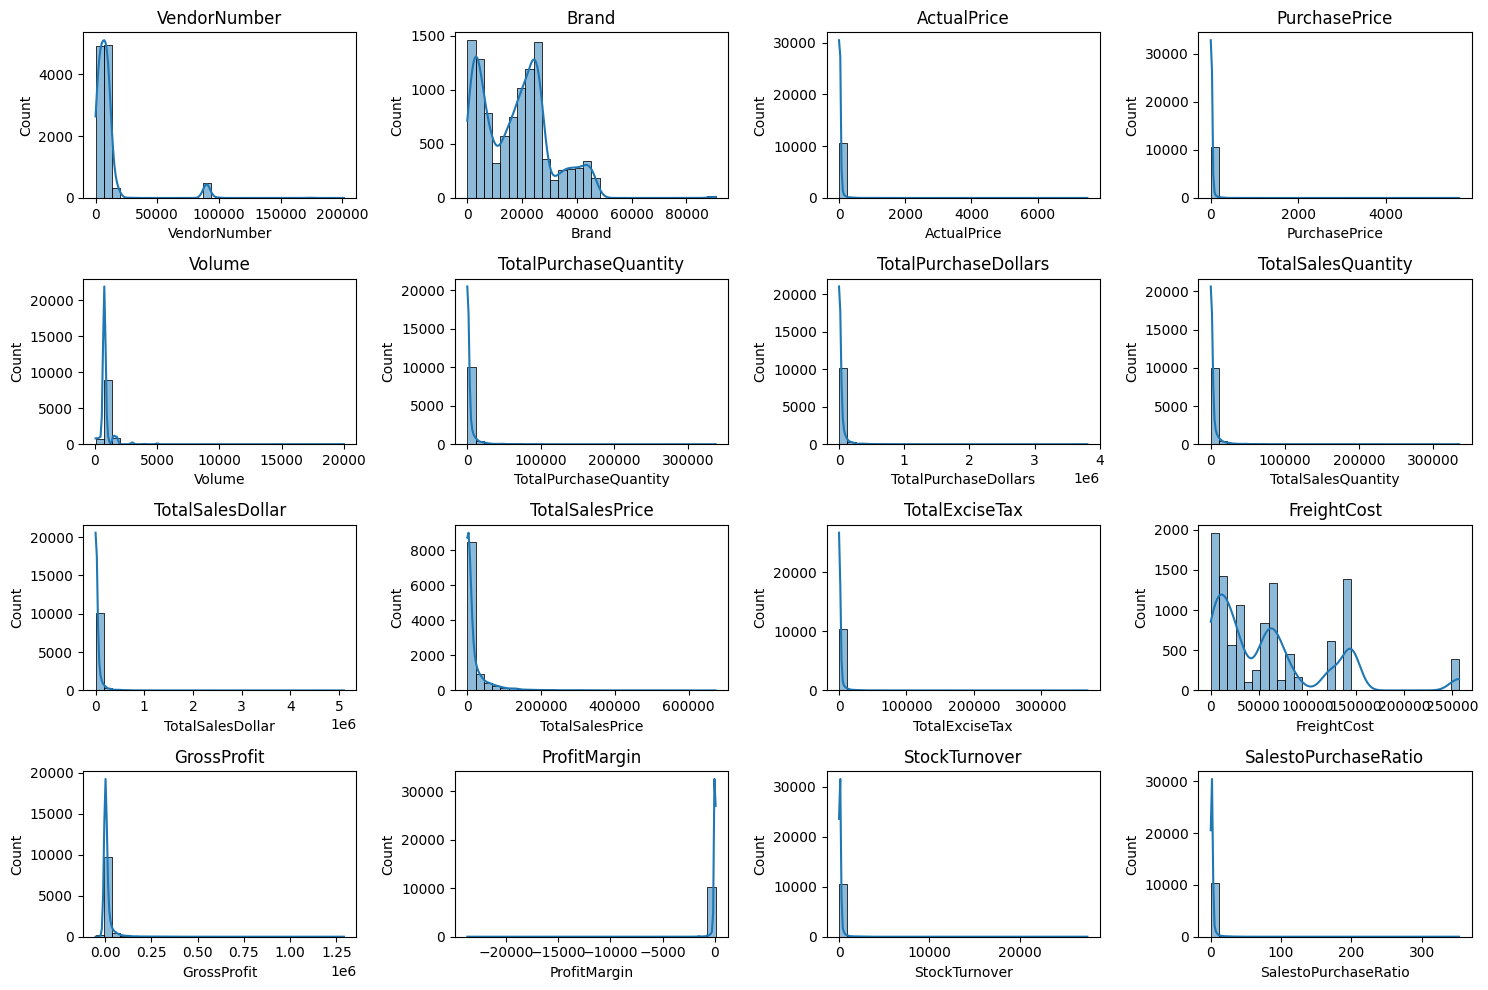

In [4]:
# Distribution plots for Numerical columns
numerical_columns = df.select_dtypes(include= np.number).columns

plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_columns):
    plt.subplot(4, 4, i+1) # adjust grid layout as needed
    sns.histplot(df[col],kde=True,bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

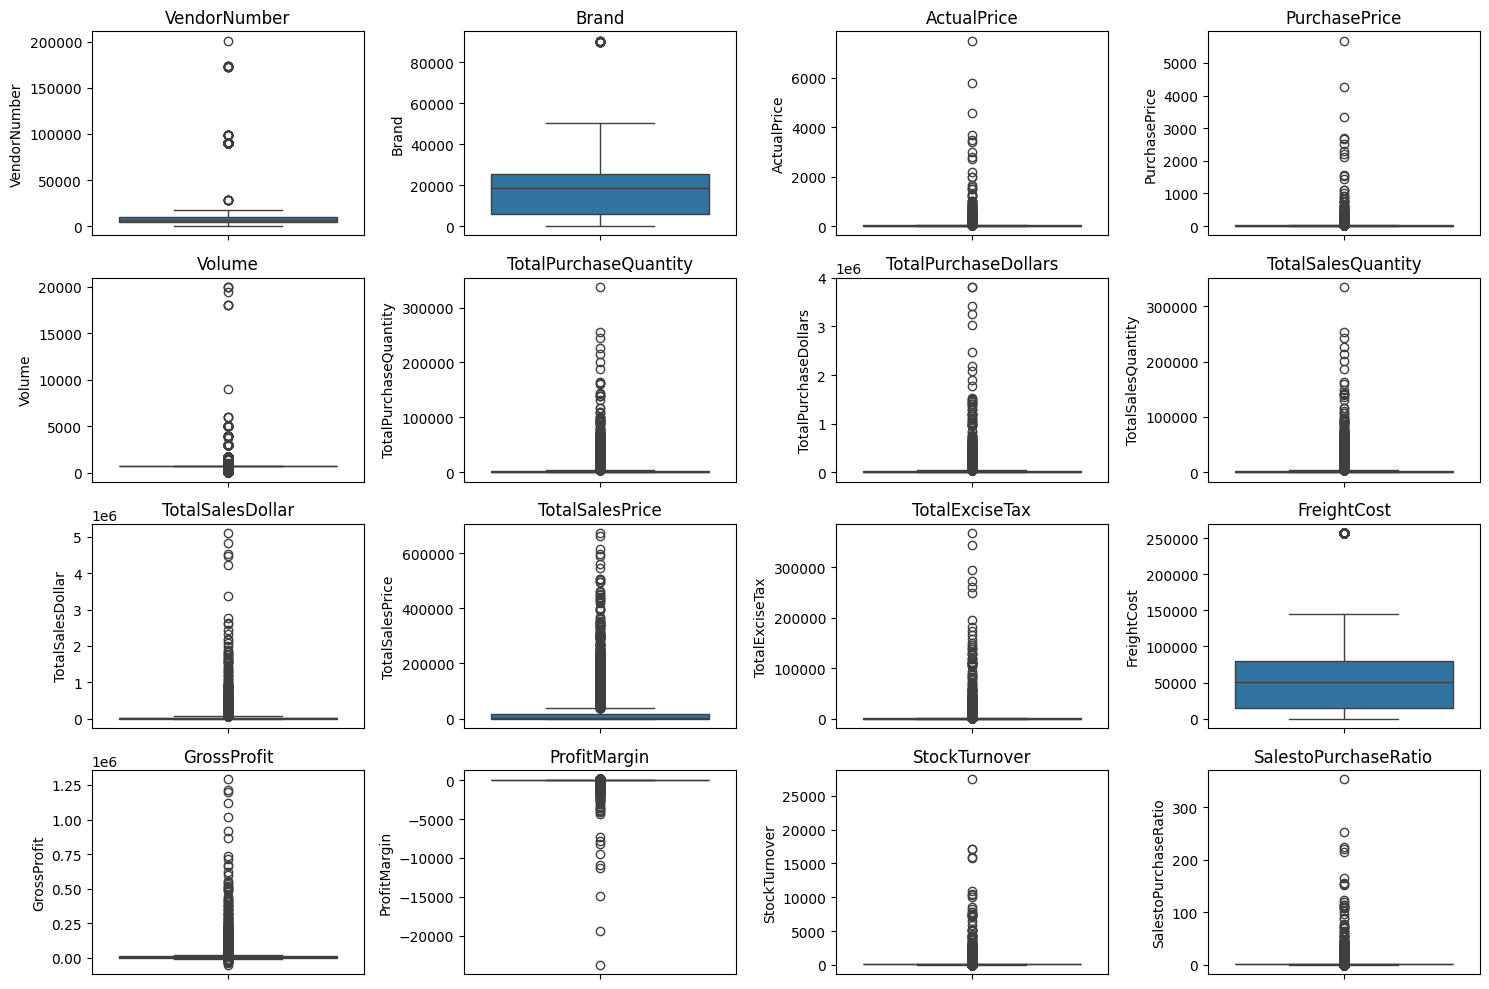

In [5]:
# Outlier detection with boxplot
plt.figure(figsize=(15,10))
for i,col in enumerate(numerical_columns):
    plt.subplot(4,4,i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [6]:
# Let's filter the data be removing inconsistencies
df = pd.read_sql_query('''select * from vendor_sales_summary
                       WHERE GrossProfit > 0
                       and ProfitMargin > 0 
                       AND TotalSalesQuantity > 0''',conn)

In [7]:
df

,VendorNumber,VendorName,Brand,Description,ActualPrice,PurchasePrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollar,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,36.99,26.27,1750.0,145080,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68,1290667.91,25.297693,97.910808,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,28.99,23.19,1750.0,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,1015032.27,21.062810,97.688950,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,24.99,18.24,1750.0,187407,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1119816.92,24.675786,99.857529,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,22.99,16.17,1750.0,201682,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,1214774.94,27.139908,99.370296,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,29.99,21.89,1750.0,138109,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07,1199901.61,28.412764,98.355647,1.396897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8559,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,4.99,1.32,750.0,2,2.64,5.0,15.95,10.96,0.55,27100.41,13.31,83.448276,250.000000,6.041667
8560,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.49,0.39,50.0,6,2.34,134.0,65.66,1.47,7.04,50293.62,63.32,96.436186,2233.333333,28.059829
8561,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.99,0.74,50.0,2,1.48,2.0,1.98,0.99,0.10,14069.87,0.50,25.252525,100.000000,1.337838
8562,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.99,1.47,200.0,1,1.47,72.0,143.28,77.61,15.12,257032.07,141.81,98.974037,7200.000000,97.469388


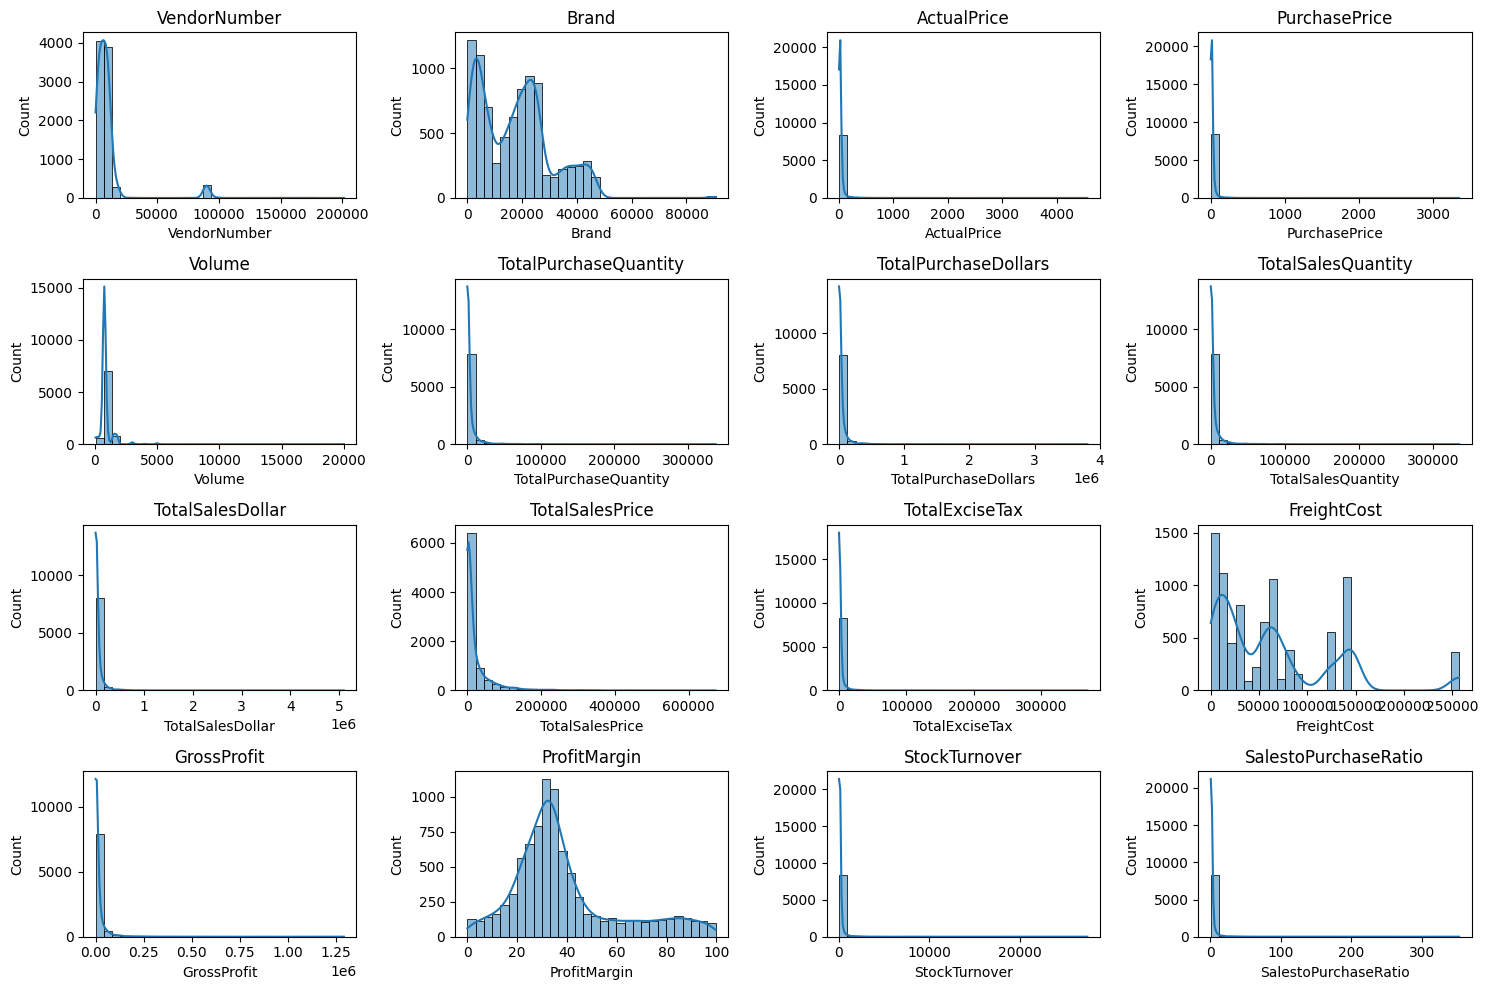

In [8]:
# Distribution plots for Numerical columns
numerical_columns = df.select_dtypes(include= np.number).columns

plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_columns):
    plt.subplot(4, 4, i+1) # adjust grid layout as needed
    sns.histplot(df[col],kde=True,bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

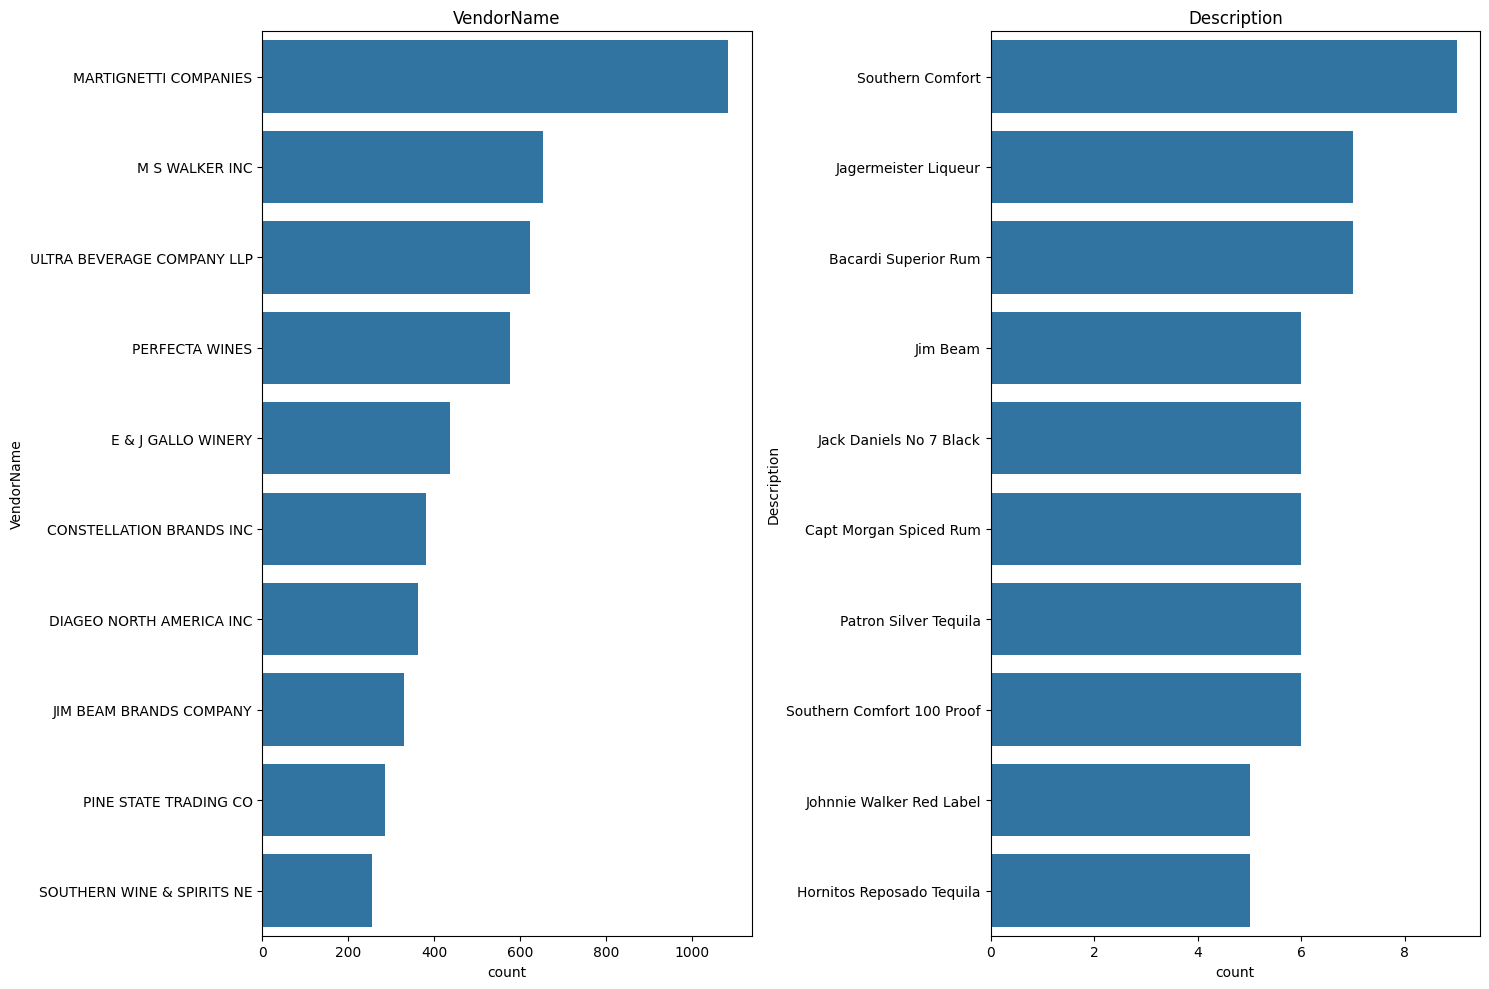

In [9]:
# Count plots for Categorical Columns
Categorical_columns = ["VendorName","Description"]

plt.figure(figsize=(15,10))
for i, col in enumerate(Categorical_columns):
    plt.subplot(1, 2, i+1) # adjust grid layout as needed
    sns.countplot(y=df[col], order=df[col].value_counts().index[:10])
    plt.title(col)
plt.tight_layout()
plt.show()

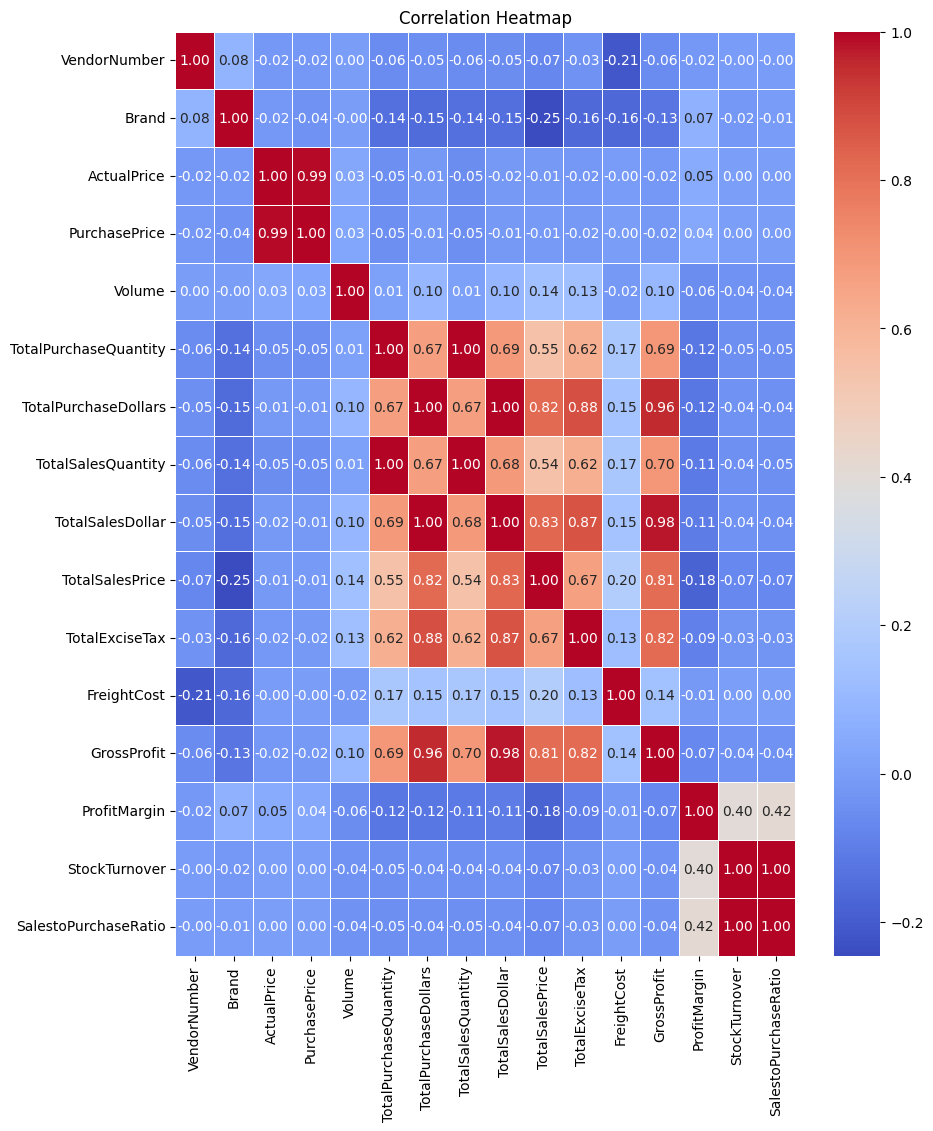

In [10]:
# Correlation HeatMap
plt.figure(figsize=(10,12))
correlation_matrix = df[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot= True, fmt=".2f", cmap="coolwarm",linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# Data Analysis

### Identify Brands that needs Promotional or Pricing adjustments which exhibit lower sales performance but higher profit margins.

In [14]:
brand_performance = df.groupby('Description').agg({
    'TotalSalesDollar':'sum',
    'ProfitMargin': 'mean'
}).reset_index()

In [15]:
low_sales_threshold = brand_performance['TotalSalesDollar'].quantile(0.15)
high_margin_threshold = brand_performance['ProfitMargin'].quantile(0.85)

In [19]:
print(low_sales_threshold)

560.299


In [18]:
print(high_margin_threshold)

64.97017552750113


In [21]:
# Filter Brands with low Sales and high Margins
target_brands = brand_performance[
    (brand_performance['TotalSalesDollar']<=low_sales_threshold) &
    (brand_performance['ProfitMargin']>=high_margin_threshold)
]
print("Brands with low sales and high margins")
display(target_brands.sort_values('TotalSalesDollar'))

Brands with low sales and high margins


,Description,TotalSalesDollar,ProfitMargin
6199,Santa Rita Organic Svgn Bl,9.99,66.466466
2369,Debauchery Pnt Nr,11.58,65.975820
2070,Concannon Glen Ellen Wh Zin,15.95,83.448276
2188,Crown Royal Apple,27.86,89.806174
6237,Sauza Sprklg Wild Berry Marg,27.96,82.153076
...,...,...,...
5074,Nanbu Bijin Southern Beauty,535.68,76.747312
2271,Dad's Hat Rye Whiskey,538.89,81.851584
57,A Bichot Clos Marechaudes,539.94,67.740860
6245,Sbragia Home Ranch Merlot,549.75,66.444748


In [23]:
brand_performance = brand_performance[brand_performance['TotalSalesDollar']<10000] # For better Visualisation

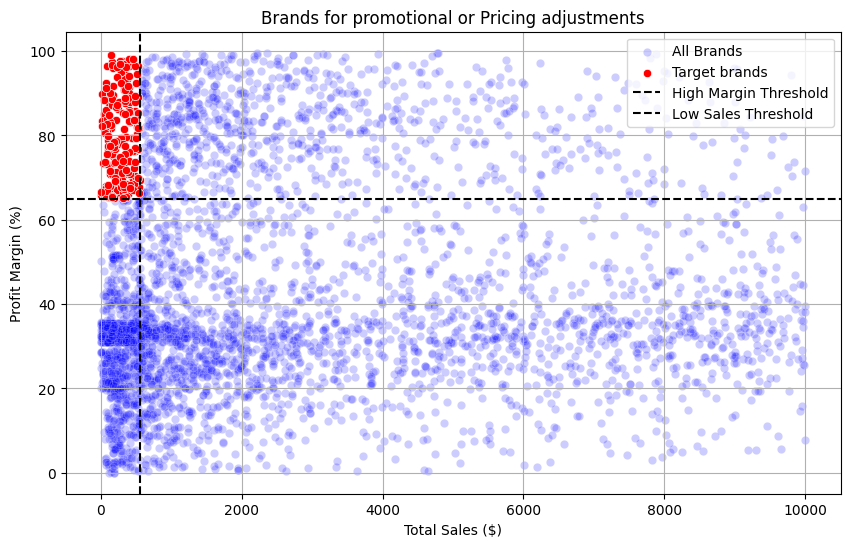

In [24]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=brand_performance, x='TotalSalesDollar', y='ProfitMargin', color='blue', label='All Brands', alpha = 0.2)
sns.scatterplot(data=target_brands, x='TotalSalesDollar', y='ProfitMargin', color='red', label="Target brands")

plt.axhline(high_margin_threshold, linestyle='--',color='black',label="High Margin Threshold")
plt.axvline(low_sales_threshold, linestyle='--', color='black', label="Low Sales Threshold")

plt.xlabel('Total Sales ($)')
plt.ylabel('Profit Margin (%)')
plt.title('Brands for promotional or Pricing adjustments')
plt.legend()
plt.grid(True)
plt.show()

### Which vendor and Brands demonstrate the highest Sales performance

In [27]:
def format_dollars(value):
    if value >= 1_000_000:
        return f"{value/1_000_000:.2f}M"
    elif value >= 1_000:
        return f"{value/1_000:.2f}K"
    else:
        return str(value)

In [28]:
# Top Vendors and Brands by Sales Performance
top_vendors = df.groupby("VendorName")["TotalSalesDollar"].sum().nlargest(10)
top_Brands = df.groupby("Description")["TotalSalesDollar"].sum().nlargest(10)
top_vendors

VendorName
DIAGEO NORTH AMERICA INC      67990099.42
MARTIGNETTI COMPANIES         39330359.36
PERNOD RICARD USA             32063196.19
JIM BEAM BRANDS COMPANY       31423020.46
BACARDI USA INC               24854817.14
CONSTELLATION BRANDS INC      24218745.65
E & J GALLO WINERY            18399899.46
BROWN-FORMAN CORP             18247230.65
ULTRA BEVERAGE COMPANY LLP    16502544.31
M S WALKER INC                14706458.51
Name: TotalSalesDollar, dtype: float64

In [26]:
top_Brands

Description
Jack Daniels No 7 Black    7964746.76
Tito's Handmade Vodka      7399657.58
Grey Goose Vodka           7209608.06
Capt Morgan Spiced Rum     6356320.62
Absolut 80 Proof           6244752.03
Jameson Irish Whiskey      5715759.69
Ketel One Vodka            5070083.56
Baileys Irish Cream        4150122.07
Kahlua                     3604858.66
Tanqueray                  3456697.90
Name: TotalSalesDollar, dtype: float64

In [29]:
top_Brands.apply(lambda x: format_dollars(x))

Description
Jack Daniels No 7 Black    7.96M
Tito's Handmade Vodka      7.40M
Grey Goose Vodka           7.21M
Capt Morgan Spiced Rum     6.36M
Absolut 80 Proof           6.24M
Jameson Irish Whiskey      5.72M
Ketel One Vodka            5.07M
Baileys Irish Cream        4.15M
Kahlua                     3.60M
Tanqueray                  3.46M
Name: TotalSalesDollar, dtype: object

In [33]:
top_vendors.apply(lambda x: format_dollars(x))

VendorName
DIAGEO NORTH AMERICA INC      67.99M
MARTIGNETTI COMPANIES         39.33M
PERNOD RICARD USA             32.06M
JIM BEAM BRANDS COMPANY       31.42M
BACARDI USA INC               24.85M
CONSTELLATION BRANDS INC      24.22M
E & J GALLO WINERY            18.40M
BROWN-FORMAN CORP             18.25M
ULTRA BEVERAGE COMPANY LLP    16.50M
M S WALKER INC                14.71M
Name: TotalSalesDollar, dtype: object

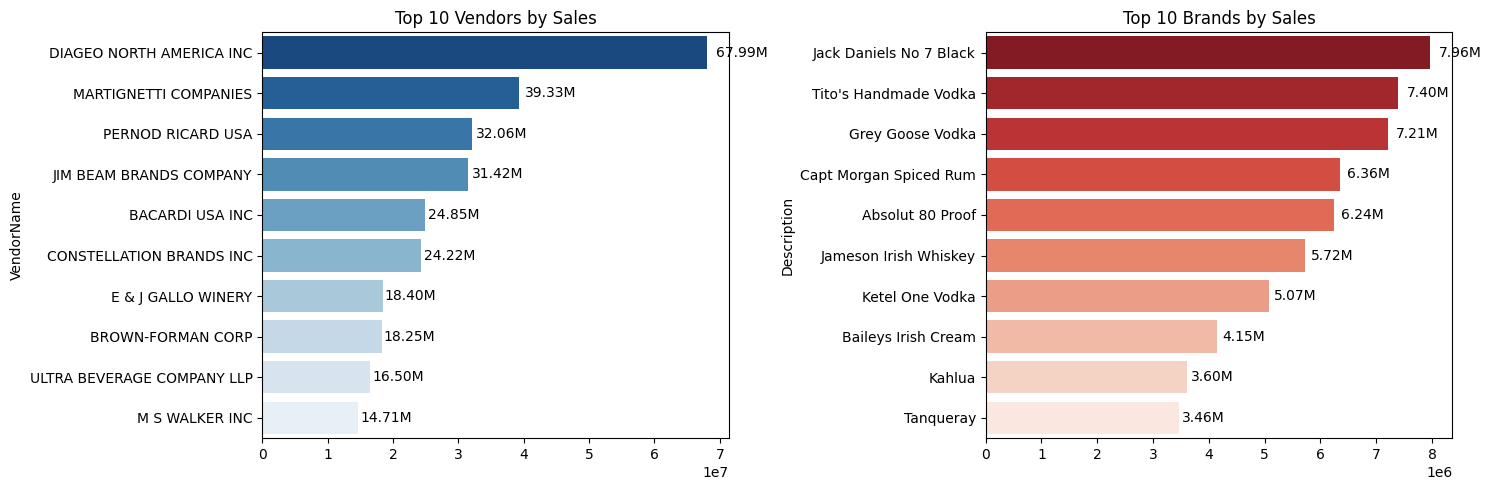

In [38]:
plt.figure(figsize=(15, 5))

# Plot for top_vendors
plt.subplot(1, 2, 1)
ax1 = sns.barplot(y=top_vendors.index, x=top_vendors.values, palette='Blues_r')
plt.title('Top 10 Vendors by Sales')

for bar in ax1.patches:
    ax1.text(bar.get_width() + bar.get_width() * 0.02,
             bar.get_y() + bar.get_height() / 2,
             format_dollars(bar.get_width()),
             ha='left', va='center', fontsize=10, color='black')

# Plot for top_Brands
plt.subplot(1, 2, 2)
ax2 = sns.barplot(y=top_Brands.index, x=top_Brands.values, palette='Reds_r')
plt.title('Top 10 Brands by Sales')

for bar in ax2.patches:
    ax2.text(bar.get_width() + bar.get_width() * 0.02,
             bar.get_y() + bar.get_height() / 2,
             format_dollars(bar.get_width()),
             ha='left', va='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()


### Which Vendors Contribute most to Total purchase Dollars

In [47]:
vendor_performance = df.groupby('VendorName').agg({
    'TotalPurchaseDollars':'sum',
    'GrossProfit':'sum',
    'TotalSalesDollar':'sum'
}).reset_index()
vendor_performance.shape

(119, 4)

In [51]:
vendor_performance['PurchaseContribution%'] = vendor_performance['TotalPurchaseDollars']/vendor_performance['TotalPurchaseDollars'].sum()*100

In [52]:
vendor_performance = round(vendor_performance.sort_values('PurchaseContribution%',ascending=False),2)

In [53]:
#Display Top 10 Vendors
top_vendors = vendor_performance.head(10)
top_vendors['TotalSalesDollar'] = top_vendors['TotalSalesDollar'].apply(format_dollars)
top_vendors['TotalPurchaseDollars'] = top_vendors['TotalPurchaseDollars'].apply(format_dollars)
top_vendors['GrossProfit'] = top_vendors['GrossProfit'].apply(format_dollars)
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollar,PurchaseContribution%
25,DIAGEO NORTH AMERICA INC,50.10M,17.89M,67.99M,16.30
57,MARTIGNETTI COMPANIES,25.50M,13.83M,39.33M,8.30
68,PERNOD RICARD USA,23.85M,8.21M,32.06M,7.76
46,JIM BEAM BRANDS COMPANY,23.49M,7.93M,31.42M,7.64
6,BACARDI USA INC,17.43M,7.42M,24.85M,5.67
20,CONSTELLATION BRANDS INC,15.27M,8.95M,24.22M,4.97
11,BROWN-FORMAN CORP,13.24M,5.01M,18.25M,4.31
30,E & J GALLO WINERY,12.07M,6.33M,18.40M,3.93
106,ULTRA BEVERAGE COMPANY LLP,11.17M,5.34M,16.50M,3.63
53,M S WALKER INC,9.76M,4.94M,14.71M,3.18


In [54]:
print(top_vendors['PurchaseContribution%'].sum())

65.69000000000001


In [55]:
top_vendors['Cumulative_Contribution%'] = top_vendors['PurchaseContribution%'].cumsum()
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollar,PurchaseContribution%,Cumulative_Contribution%
25,DIAGEO NORTH AMERICA INC,50.10M,17.89M,67.99M,16.30,16.30
57,MARTIGNETTI COMPANIES,25.50M,13.83M,39.33M,8.30,24.60
68,PERNOD RICARD USA,23.85M,8.21M,32.06M,7.76,32.36
46,JIM BEAM BRANDS COMPANY,23.49M,7.93M,31.42M,7.64,40.00
6,BACARDI USA INC,17.43M,7.42M,24.85M,5.67,45.67
20,CONSTELLATION BRANDS INC,15.27M,8.95M,24.22M,4.97,50.64
11,BROWN-FORMAN CORP,13.24M,5.01M,18.25M,4.31,54.95
30,E & J GALLO WINERY,12.07M,6.33M,18.40M,3.93,58.88
106,ULTRA BEVERAGE COMPANY LLP,11.17M,5.34M,16.50M,3.63,62.51
53,M S WALKER INC,9.76M,4.94M,14.71M,3.18,65.69


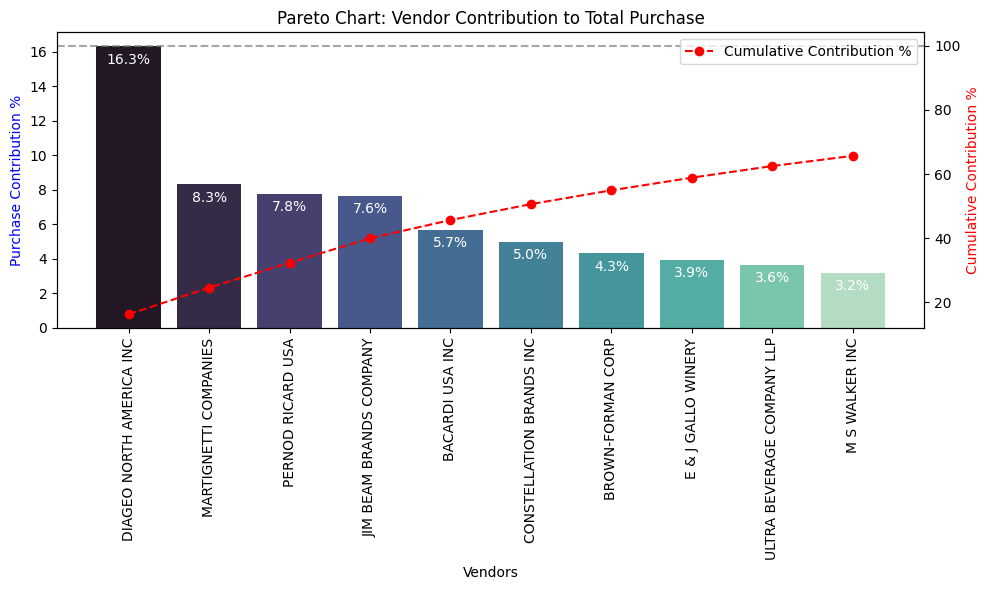

In [59]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for Purchase Contribution
sns.barplot(x=top_vendors['VendorName'], y=top_vendors['PurchaseContribution%'], palette='mako', ax=ax1)

for i, value in enumerate(top_vendors['PurchaseContribution%']):
    ax1.text(i, value - 1, f"{value:.1f}%", ha='center', fontsize=10, color='white')

# Line plot for cumulative contribution
ax2 = ax1.twinx()
ax2.plot(top_vendors['VendorName'], top_vendors['Cumulative_Contribution%'], color='red', marker='o', linestyle='dashed', label='Cumulative Contribution %')

# Axis labels and formatting
ax1.set_xticklabels(top_vendors['VendorName'], rotation=90)
ax1.set_ylabel('Purchase Contribution %', color='blue')
ax2.set_ylabel('Cumulative Contribution %', color='red')
ax1.set_xlabel('Vendors')
ax1.set_title('Pareto Chart: Vendor Contribution to Total Purchase')

ax2.axhline(y=100, color='gray', linestyle='dashed', alpha=0.7)
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()


### How much of Total procurement is dependent on the top vendors

In [60]:
print(f"Total Prchase Contribution of Top 10 Vendors is {round(top_vendors['PurchaseContribution%'].sum(),2)}%")

Total Prchase Contribution of Top 10 Vendors is 65.69%


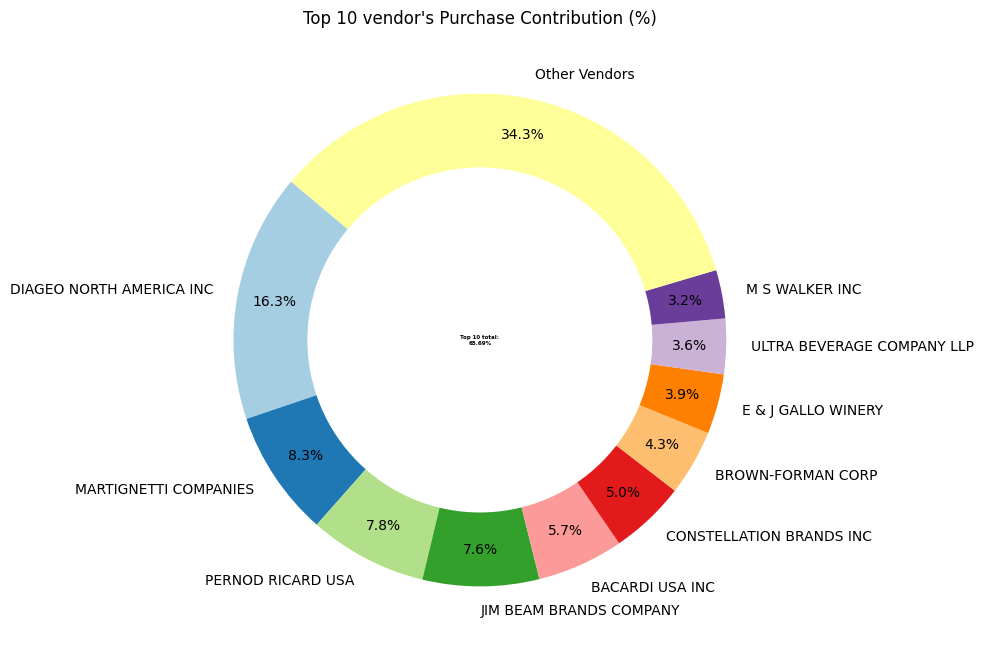

In [61]:
vendors = list(top_vendors['VendorName'].values)
purchase_contributions = list(top_vendors['PurchaseContribution%'].values)
total_contribution = sum(purchase_contributions)
remaining_contributions = 100 - total_contribution

# Append "other vendors" Category
vendors.append("Other Vendors")
purchase_contributions.append(remaining_contributions)

# Donut Chart
fig, ax = plt.subplots(figsize=(8,8))
wedges, texts, autotexts = ax.pie(purchase_contributions, labels=vendors, autopct='%1.1f%%',
                                  startangle=140, pctdistance=0.85, colors=plt.cm.Paired.colors)


# Draw a white circle in the center to create a donut effect
center_circle = plt.Circle((0,0), 0.70,fc='white')
fig.gca().add_artist(center_circle)

# Add total contribution annotation in the center
plt.text(0, 0, f"Top 10 total:\n{total_contribution:.2f}%", fontsize=4, fontweight='bold',ha='center', va='center')

plt.title("Top 10 vendor's Purchase Contribution (%)")
plt.show()

### Does purchasing in Bulk reduce the unit price, and what is the otimal purchase volume for cost saving

In [62]:
df['UnitPurchaseprice'] = df['TotalPurchaseDollars']/df['TotalPurchaseQuantity']

In [64]:
df['OrderSize'] = pd.qcut(df['TotalPurchaseQuantity'], q=3, labels=['Small','Medium','Large'])
df['OrderSize']

0       Large
1       Large
2       Large
3       Large
4       Large
        ...  
8559    Small
8560    Small
8561    Small
8562    Small
8563    Small
Name: OrderSize, Length: 8564, dtype: category
Categories (3, object): ['Small' < 'Medium' < 'Large']

In [68]:
df.groupby('OrderSize')[['UnitPurchaseprice']].mean()

,UnitPurchaseprice
OrderSize,
Small,39.068186
Medium,15.486414
Large,10.777625


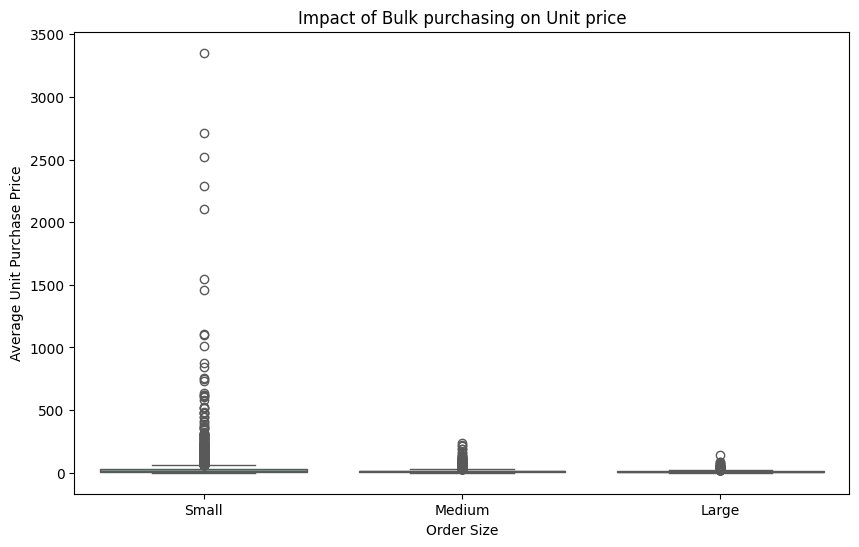

In [70]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='OrderSize', y='UnitPurchaseprice', palette='Set2')
plt.title("Impact of Bulk purchasing on Unit price")
plt.xlabel("Order Size")
plt.ylabel("Average Unit Purchase Price")
plt.show()

### Which Vendor's have low inventory turnover indicating excess stock and slow moving products

In [88]:
df[df['StockTurnover']<100].groupby('VendorName')[['StockTurnover']].mean().sort_values('StockTurnover',ascending=True).head(10)

,StockTurnover
VendorName,
ALISA CARR BEVERAGES,61.538462
HIGHLAND WINE MERCHANTS LLC,70.833333
PARK STREET IMPORTS LLC,75.130617
Circa Wines,75.567582
Dunn Wine Brokers,76.602213
CENTEUR IMPORTS LLC,77.395295
SMOKY QUARTZ DISTILLERY LLC,78.383459
TAMWORTH DISTILLING,79.707792
THE IMPORTED GRAPE LLC,80.756916


### How much Capital is locked unsold inventory unpaid and which vendors contribute most to it.

In [94]:
df['UnsoldInventoryValue'] = (df['TotalPurchaseQuantity'] - df['TotalSalesQuantity'])*df['PurchasePrice']
print("Total Unsold Capital:",format_dollars(df['UnsoldInventoryValue'].sum()))

Total Unsold Capital: 2.71M


In [97]:
# Aggregated capital Locked per User
inventory_value_per_vendor = df.groupby('VendorName')['UnsoldInventoryValue'].sum().reset_index()

# Sort vendors with highest locked Capital
inventory_value_per_vendor = inventory_value_per_vendor.sort_values(by="UnsoldInventoryValue", ascending=False)
inventory_value_per_vendor['UnsoldInventoryValue'] = inventory_value_per_vendor['UnsoldInventoryValue'].apply(format_dollars)
inventory_value_per_vendor.head(10)

,VendorName,UnsoldInventoryValue
25,DIAGEO NORTH AMERICA INC,722.21K
46,JIM BEAM BRANDS COMPANY,554.67K
68,PERNOD RICARD USA,470.63K
116,WILLIAM GRANT & SONS INC,401.96K
30,E & J GALLO WINERY,228.28K
79,SAZERAC CO INC,198.44K
11,BROWN-FORMAN CORP,177.73K
20,CONSTELLATION BRANDS INC,133.62K
61,MOET HENNESSY USA INC,126.48K
77,REMY COINTREAU USA INC,118.60K


### What is the 95% confidence Interval for margins of top performing and low performingvendors

In [99]:
top_threshold = df['TotalSalesDollar'].quantile(0.75)
low_threshold = df['TotalSalesDollar'].quantile(0.25)

In [101]:
top_vendors = df[df['TotalSalesDollar'] >= top_threshold]['ProfitMargin'].dropna()
low_vendors = df[df['TotalSalesDollar'] <= low_threshold]['ProfitMargin'].dropna()

In [102]:
top_vendors

0       25.297693
1       21.062810
2       24.675786
3       27.139908
4       28.412764
          ...    
3523    79.684817
3681    85.782102
4751    93.085860
4920    95.012530
5050    94.271857
Name: ProfitMargin, Length: 2141, dtype: float64

In [103]:
def confidence_interval(data, confidence=0.95):
    mean_val = np.mean(data)
    std_err = np.std(data, ddof=1) /np.sqrt(len(data)) # Standard error
    t_critical = stats.t.ppf((1+confidence) / 2, df = len(data) - 1)
    margin_of_error = t_critical * std_err
    return mean_val, mean_val - margin_of_error, mean_val + margin_of_error


 Top Vendor's 95% CI: (30.74, 31.61, mean: 31.18)
Low Vendor's 95% CI: (40.50, 42.64, mean:41.57)


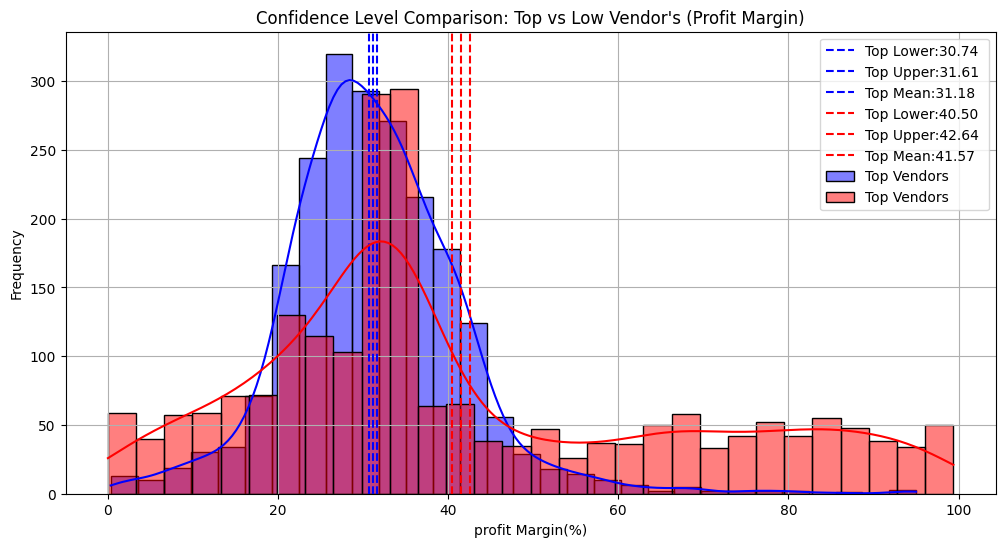

In [104]:
top_mean, top_lower, top_upper = confidence_interval(top_vendors)
low_mean, low_lower, low_upper = confidence_interval(low_vendors)

print(f" Top Vendor's 95% CI: ({top_lower:.2f}, {top_upper:.2f}, mean: {top_mean:.2f})")
print(f"Low Vendor's 95% CI: ({low_lower:.2f}, {low_upper:.2f}, mean:{low_mean:.2f})")

plt.figure(figsize=(12,6))

# Top Vendor's Plot
sns.histplot(top_vendors, kde = True, color='blue', bins = 30, alpha = 0.5, label = "Top Vendors")
plt.axvline(top_lower, color = 'blue', linestyle = "--", label = f"Top Lower:{top_lower:.2f} ")
plt.axvline(top_upper, color = 'blue', linestyle = "--", label = f"Top Upper:{top_upper:.2f} ")
plt.axvline(top_mean, color = 'blue', linestyle = "--", label = f"Top Mean:{top_mean:.2f} ")

# Low Vendor's Plot
sns.histplot(low_vendors, kde = True, color='red', bins = 30, alpha = 0.5, label = "Top Vendors")
plt.axvline(low_lower, color = 'red', linestyle = "--", label = f"Top Lower:{low_lower:.2f} ")
plt.axvline(low_upper, color = 'red', linestyle = "--", label = f"Top Upper:{low_upper:.2f} ")
plt.axvline(low_mean, color = 'red', linestyle = "--", label = f"Top Mean:{low_mean:.2f} ")

# Finalize plot
plt.title("Confidence Level Comparison: Top vs Low Vendor's (Profit Margin)")
plt.xlabel("profit Margin(%)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

In [105]:
top_threshold = df['TotalSalesDollar'].quantile(0.75)
low_threshold = df['TotalSalesDollar'].quantile(0.25)

top_vendors = df[df['TotalSalesDollar'] >= top_threshold]['ProfitMargin'].dropna()
low_vendors = df[df['TotalSalesDollar'] <= low_threshold]['ProfitMargin'].dropna()


#Perform two Samples T-test
t_start, p_value, = ttest_ind(top_vendors, low_vendors, equal_var= False)

#print results
print(f"T-Statistics: {t_start:.4f}, P-Value: {p_value:.4f}")
if p_value < 0.05:
    print("Reject H : There is significant difference in profit margins between top and low-performing Venfor's")
else:
    print("Fail to reject H: No significant difference in profit margins")

T-Statistics: -17.6695, P-Value: 0.0000
Reject H : There is significant difference in profit margins between top and low-performing Venfor's
